In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [11]:
df = pd.read_excel('AdventureWorks.xlsx')

In [14]:
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


# Qual a Receita Total?

In [23]:
df['Valor Venda'].sum()

5984606.1426

# Qual o Custo Total

In [24]:
df['custo'] = df['Custo Unitário']*df['Quantidade']
df['custo'].sum()

2486783.05

# Lucro Total?

In [25]:
df['lucro'] = df['Valor Venda'] - df['custo']
df['lucro'].sum()

3497823.0926

In [27]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
dtype: object

# Tempo de envio?

In [29]:
df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df['Tempo_envio']

0      20
1       5
2       6
3       6
4       7
       ..
899    13
900    11
901     4
902     4
903     4
Name: Tempo_envio, Length: 904, dtype: int64

In [30]:
df['Tempo_envio'].mean()

8.543141592920353

# Lucro por Ano e Por Marca?

In [34]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

# Total de produtos vendidos?

In [35]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

# Qual o total de produtos vendidos?

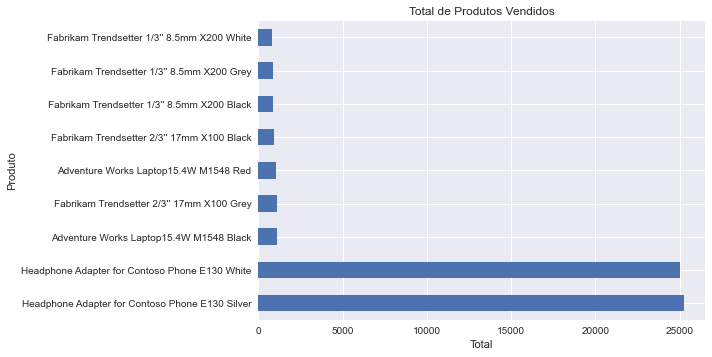

In [38]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).plot.barh(title='Total de Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produto');

# Selecione apenas as vendas de 2009

Text(0, 0.5, 'Lucro')

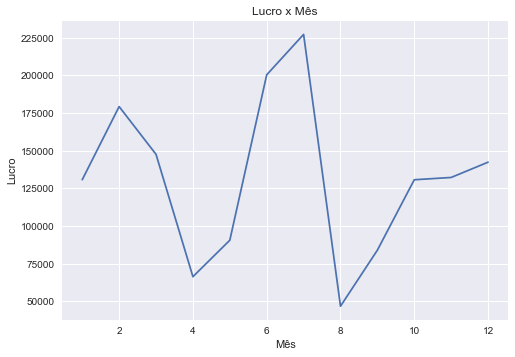

In [40]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')
